In [31]:
%run SetupNSTNetworks.py
%run TrainNSTNetworks.py


cuda


In [32]:
style_img = image_loader("/home/andy/NST/Tutorial/LF1.jpg")
content_img = image_loader("/home/andy/NST/Tutorial/hat_square.jpg")
input_img = content_img.clone()
print(style_img.size(), " ", content_img.size())

assert style_img.size() == content_img.size(), \
    "we need to import style and content images of the same size"

cnn, cnn_normalization_mean, cnn_normalization_std, content_layers, style_layers = setup_googlenet()

torch.Size([1, 3, 512, 512])   torch.Size([1, 3, 512, 512])


Building the style transfer model..
info
Optimizing..
run [50]:
Style Loss : 54.231770 Content Loss: 0.330848
run [100]:
Style Loss : 5.697811 Content Loss: 0.341521
run [150]:
Style Loss : 1.370931 Content Loss: 0.334868
run [200]:
Style Loss : 0.513345 Content Loss: 0.328924
run [250]:
Style Loss : 0.272449 Content Loss: 0.319118
run [300]:
Style Loss : 0.225440 Content Loss: 0.304869


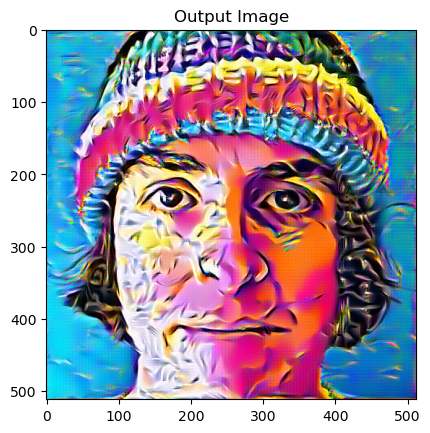

In [33]:
output, model = run_style_transfer(cnn, cnn_normalization_mean, cnn_normalization_std,
                            content_img, style_img, input_img, content_layers, style_layers,
                            style_weight=10000000, num_steps=300)

plt.figure()
imshow(input_img, title='Output Image')

In [8]:
save_out = transforms.functional.to_pil_image(input_img.squeeze())
save_out.save("LFMe3.jpg")